In [5]:
import numpy as np 
import pandas as pd 

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

import os


**Symptoms of Coronavirus**
* [Source](http://en.wikipedia.org/wiki/Coronavirus_disease_2019)

In [68]:
symptoms={'symptôme':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'pourcentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

,symptôme,pourcentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


In [70]:
fig = px.bar(symptoms[['symptôme', 'pourcentage']].sort_values('pourcentage', ascending=False), 
             y="pourcentage", x="symptôme", color='symptôme', 
             log_y=True, template='ggplot2', title='Symptôme de Coronavirus')
fig.show()

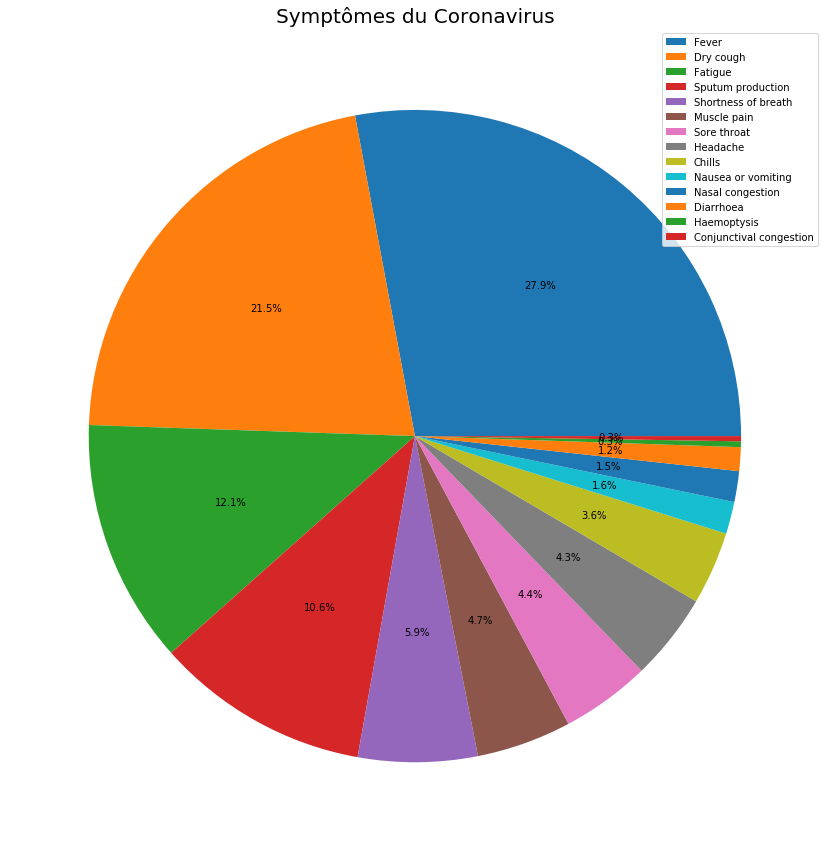

In [60]:
plt.figure(figsize=(15,15))
plt.title('Symptômes du Coronavirus',fontsize=20)    
plt.pie(symptoms['percentage'],autopct='%1.1f%%')
plt.legend(symptoms['symptom'],loc='best')
plt.show() 

In [10]:
df_covid = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
df_covid.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country', 'Province/State':'Province' }, inplace=True)

In [11]:
df_covid.shape

(10358, 8)

In [13]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 8 columns):
SNo            10358 non-null int64
Date           10358 non-null object
Province       5578 non-null object
Country        10358 non-null object
Last Update    10358 non-null datetime64[ns]
Confirmed      10358 non-null float64
Deaths         10358 non-null float64
Recovered      10358 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 647.5+ KB


In [14]:
df_covid.head()

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


# Check the latest observation date


In [15]:
ondate=max(df_covid['Date'])
print ("The last observation date is " + ondate)

The last observation date is 03/30/2020


# Functions for plotting

In [16]:
def plot_bar_chart(confirmed, deaths, recoverd, country, fig=None):
    if fig is None:
        fig = go.Figure()
    fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed'
                ))
    fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths'
                ))
    fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered'
                ))

    fig.update_layout(
        title= 'Cumulative Daily Cases of COVID-19 (Confirmed, Deaths, Recovered) - ' + country + ' as of ' + ondate ,
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Number of Cases',
            titlefont_size=14,
            tickfont_size=12,
        ),
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15, 
        bargroupgap=0.1 
    )
    return fig

In [17]:
def plot_line_chart(confirmed, deaths, recoverd, country, fig=None):
    if fig is None:
        fig = go.Figure()
    fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed'
                         ))
    fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths'
                         ))
    fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered'
                        ))
    fig.update_layout(
        title= 'Number of COVID-19 Cases Over Time - ' + country + ' as of ' + ondate ,
        xaxis_tickfont_size=12,
        yaxis=dict(
           title='Number of Cases',
           titlefont_size=14,
           tickfont_size=12,
        ),
        legend=dict(
           x=0,
           y=1.0,
           bgcolor='rgba(255, 255, 255, 0)',
           bordercolor='rgba(255, 255, 255, 0)'
        )
     )
    return fig

# What is happening Worldwide

In [23]:
confirmed = df_covid.groupby('Date').sum()['Confirmed'].reset_index() 
deaths = df_covid.groupby('Date').sum()['Deaths'].reset_index() 
recovered = df_covid.groupby('Date').sum()['Recovered'].reset_index()

In [24]:
plot_bar_chart(confirmed, deaths, recovered,'Worldwide').show()

In [25]:
plot_line_chart(confirmed, deaths, recovered,'Worldwide').show()

# What is going on in France

In [35]:
France_df = df_covid[df_covid['Country'] == 'France'].copy()
France_df.head() 

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
124,125,01/24/2020,NaN,France,2020-01-24 17:00:00,2.0,0.0,0.0
165,166,01/25/2020,NaN,France,2020-01-25 17:00:00,3.0,0.0,0.0
211,212,01/26/2020,NaN,France,2020-01-26 16:00:00,3.0,0.0,0.0
258,259,01/27/2020,NaN,France,2020-01-27 23:59:00,3.0,0.0,0.0
309,310,01/28/2020,NaN,France,2020-01-28 23:00:00,4.0,0.0,0.0


In [36]:
France_df.tail()

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
10288,10289,03/30/2020,Mayotte,France,2020-03-30 22:58:55,82.0,0.0,10.0
10298,10299,03/30/2020,New Caledonia,France,2020-03-30 22:58:55,15.0,0.0,0.0
10324,10325,03/30/2020,Reunion,France,2020-03-30 22:58:55,224.0,0.0,1.0
10326,10327,03/30/2020,Saint Barthelemy,France,2020-03-30 22:58:55,6.0,0.0,1.0
10337,10338,03/30/2020,St Martin,France,2020-03-30 22:58:55,15.0,1.0,2.0


In [39]:
confirmed = France_df.groupby(['Date', 'Province'])['Confirmed'].sum().reset_index()
provinces = France_df['Province'].unique()
provinces

array([nan, 'France', 'St Martin', 'Saint Barthelemy', 'French Polynesia',
       'Fench Guiana', 'French Guiana', 'Mayotte', 'Guadeloupe',
       'Reunion', 'New Caledonia', 'Martinique'], dtype=object)

In [40]:
France_df = France_df.replace(to_replace =["France", "St Martin"],  
                            value ="Saint Barthelemy") 
France_df = France_df.replace(to_replace =["French Polynesia", "Fench Guiana"],  
                            value ="French Guiana") 
France_df =France_df.replace(to_replace =[" Mayotte"],  
                            value ="Guadeloupe")  
France_df =France_df.replace(to_replace =["Reunion"],  
                            value ="New Caledonia") 

# Visualization

In [41]:
confirmed = France_df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = France_df.groupby('Date').sum()['Deaths'].reset_index()
recovered = France_df.groupby('Date').sum()['Recovered'].reset_index()

In [42]:
plot_bar_chart(confirmed, deaths, recovered,'France').show()

In [43]:
plot_line_chart(confirmed, deaths, recovered,'France').show()

In [44]:
provinces = France_df['Province'].unique()
provinces

array([nan, 'Saint Barthelemy', 'French Guiana', 'Mayotte', 'Guadeloupe',
       'New Caledonia', 'Martinique'], dtype=object)

In [46]:
confirmed = France_df.groupby(['Date', 'Province'])['Confirmed'].sum().reset_index()

In [47]:
fig = go.Figure()
for province in provinces:
 
    fig.add_trace(go.Scatter(
        x=confirmed[confirmed['Province']==province]['Date'],
        y=confirmed[confirmed['Province']==province]['Confirmed'],
        name = province, 
        connectgaps=True 
    ))
fig.update_layout(title="Number of Confirmed COVID-19 Cases Over Time - France - By Province" + ' as of ' + ondate)       
fig.show()

In [49]:
grouped_country = France_df.groupby(["Province"] ,as_index=False)["Confirmed","Recovered","Deaths"].last().sort_values(by="Confirmed",ascending=False)
grouped_country

,Province,Confirmed,Recovered,Deaths
4,New Caledonia,224.0,1.0,0.0
1,Guadeloupe,106.0,17.0,4.0
2,Martinique,93.0,0.0,1.0
3,Mayotte,82.0,10.0,0.0
0,French Guiana,36.0,0.0,0.0
5,Saint Barthelemy,15.0,2.0,1.0


In [50]:
fig = go.Figure()

fig.add_trace(go.Bar(
    
    y=grouped_country['Province'],
    x=grouped_country['Confirmed'],
    orientation='h',
    text=grouped_country['Confirmed']
    ))
fig.update_traces(textposition='outside')
fig.update_layout(title="Cumulative Number of COVID-19 Confirmed Cases - By Province" + ' as of ' + ondate)    
fig.show()


In [59]:
fig = go.Figure()

trace1 = go.Bar(
    x=grouped_country['Confirmed'],
    y=grouped_country['Province'],
    orientation='h',
    name='Confirmed'
)
trace2 = go.Bar(
    x=grouped_country['Deaths'],
    y=grouped_country['Province'],
    orientation='h',
    name='Deaths'
)
trace3 = go.Bar(
    x=grouped_country['Recovered'],
    y=grouped_country['Province'],
    orientation='h',
    name='Recovered'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(title="Stacked Number of COVID-19 Cases (Confirmed, Deaths, Recoveries) - France by Province" + ' as of ' + ondate)    
fig.show()

# Advanced Data Analysis

In [54]:
ts_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
ts_confirmed.rename(columns={'Country/Region':'Country', 'Province/State':'Province' }, inplace=True)
France_C_ts = ts_confirmed[ts_confirmed['Country'] == 'France'].copy()
France_C_ts

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,18,18,20,23,28,28,28,28,28,43
108,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,15,18,18,25,25,30,30,30,30,36
109,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,53,58,62,62,73,73,73,102,106,106
110,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,7,11,24,36,36,36,50,63,63,82
111,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,...,4,4,8,10,14,14,15,15,15,15
112,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,45,64,71,94,111,135,145,183,183,224
113,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,3,3,3,3,3,3,5,5,5,6
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,4,5,8,8,11,11,11,11,11,15
115,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,...,32,44,53,57,66,66,81,93,93,93
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,14282,16018,19856,22304,25233,29155,32964,37575,40174,44550


In [57]:
ts_diff =France_C_ts[France_C_ts.columns[4:France_C_ts.shape[1]]]
new = ts_diff.diff(axis = 1, periods = 1) 
ynew=list(new.sum(axis=0))

In [58]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=ynew,
    x=ts_diff.columns,
    text=list(new.sum(axis=0)),
    ))
fig.update_traces(textposition='outside')
fig.update_layout(title="Epidemic Curve - Daily Number of COVID-19 Confirmed Cases in FRANCE " + ' as of  ' + ondate,
                 yaxis=dict(title='Number of Cases'))    
fig.show()